In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import interpolate

# Read data from mesa data: 
a = pd.read_excel("ONe6040_helm_update.xlsx")

# Read data after the initial module
f = open("ecsn.hse.25600","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')
#for i in range(len(data2d)-1,-1,-1):
#    if len(data2d[i]) == 3:
##        aaaaa = data2d[i].copy()
#        data2d.pop(i)
#        i+=1
#    else:
#        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f20','he4','al27','si28','s32','p31','h1']
df.head(2)

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,3906.25,8.348568e+09,6.565862e+08,7.352024e+27,0.000001,0.6,0.399999,7.135653e-12,2.307585e-11,1.229702e-21,1.000000e-40,3.085241e-07,1.000000e-40,1.000000e-40,6.598153e-30
1,11718.75,8.348566e+09,6.565862e+08,7.352022e+27,0.000001,0.6,0.399999,7.292993e-12,2.358467e-11,1.256817e-21,1.000000e-40,3.153270e-07,1.000000e-40,1.000000e-40,6.743641e-30


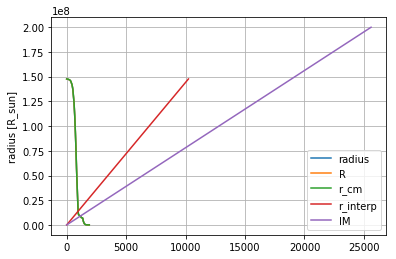

In [2]:
r_sun = 6.955e10  # cm
m_sun = 1.989e33  # gram
radius = np.array(a["radius"])
R = np.power(10,np.array(a["logR"]))
r_cm = np.array(a["radius_cm"])

r_interp = np.linspace(radius[-1], radius[ 0], 10240)

plt.plot(radius*r_sun, label='radius')
plt.plot(R*r_sun, label='R')
plt.plot(r_cm, label='r_cm')
plt.plot(r_interp*r_sun, label='r_interp')


plt.plot(np.array(df['radius']), label='IM')
#plt.plot(df1['radius'],label='rm_plateo')


plt.legend()
plt.xlabel("")
plt.ylabel("radius [R_sun]")
plt.grid()
plt.show()

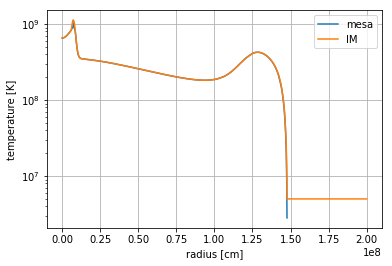

In [3]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

#T_interp = np.interp(r_interp, radius[::-1], temp[::-1])
f_interp = interpolate.interp1d(radius[::-1],temp[::-1],kind='nearest')
T_interp = f_interp(r_interp)

plt.semilogy(radius*r_sun,temp,'-',label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='IM')
#plt.plot(r_interp*r_sun,T_interp,'s-',label='interp')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

#plt.xlim(7.23e6,7.30e6)
#plt.xlim(585937.5,1367187.5)
#plt.xlim(0,4.1e7)
#plt.ylim(1e8,1.2e9)
plt.grid()
plt.legend()
plt.show()

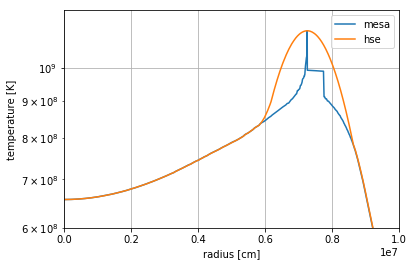

In [38]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.semilogy(radius*r_sun,temp,'-', label='mesa')
#plt.semilogy(R*r_sun,T,":")
#plt.semilogy(r_interp,T_interp)

plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
#plt.xlim(7.2e6,8e6)
#plt.xlim(585937.5,1367187.5)
plt.ylim(0.6e9,1.2e9)
plt.xlim(0.4,1e7)
plt.legend()
plt.grid()
#plt.show()
plt.savefig("temp_initial model")

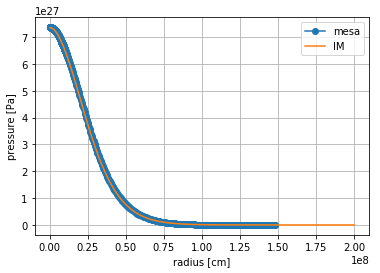

In [5]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.plot(R*r_sun,pressure, "o-",label='mesa')
#plt.plot(R*r_sun,P)
#plt.plot(r_interp*r_sun,p_interp)

plt.plot(np.array(df['radius']),np.array(df['pressure']),"-",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")

#plt.xlim(0,1000000)
#plt.ylim(6.7e27,7e27)
#plt.xlim(7.2e6,8e6)
#plt.ylim(0.88e9,1.2e9)
plt.legend()
plt.grid()
#plt.show()
#plt.savefig("pressure_initial_model")

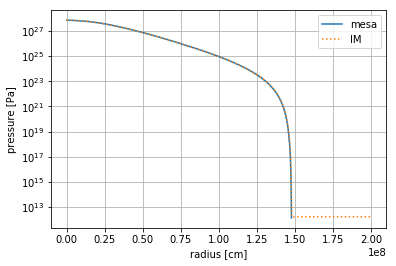

In [6]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.semilogy(R*r_sun,pressure,label='mesa')
#plt.semilogy(R*r_sun,P)
#plt.semilogy(r_interp*r_sun,p_interp)

plt.semilogy(np.array(df['radius']),np.array(df['pressure']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
plt.legend()
#plt.ylim(5e20,2e28)
plt.grid()
plt.show()

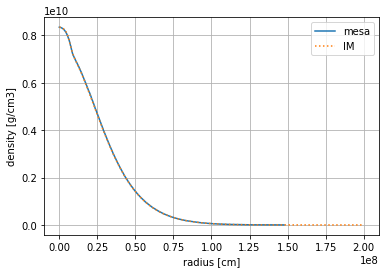

In [7]:
rho = np.power(10,np.array(a["logRho"]))

plt.plot(radius*r_sun,rho,label='mesa')

plt.plot(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.legend()
plt.grid()
plt.show()

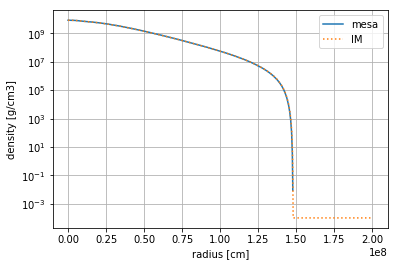

In [8]:
plt.semilogy(radius*r_sun,rho,label='mesa')

plt.semilogy(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.grid()
plt.legend()
plt.show()

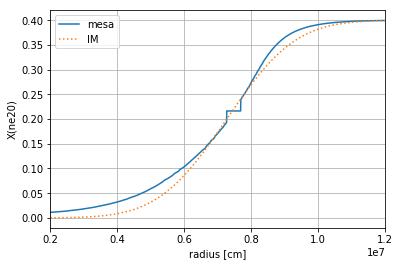

In [25]:
element = 'ne20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(2e6,12e6)
#plt.xlim(7.2e6,8e6)
plt.grid()
plt.legend()
plt.show()

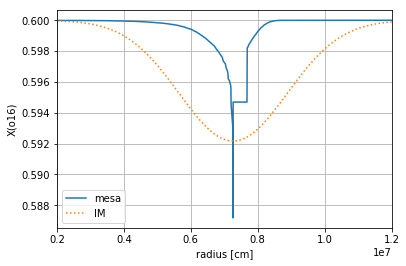

In [26]:
element = 'o16'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.xlim(2e6,12e6)
plt.grid()
plt.legend()
plt.show()

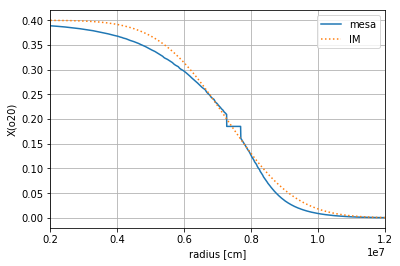

In [27]:
element = 'o20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(2e6,12e6)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

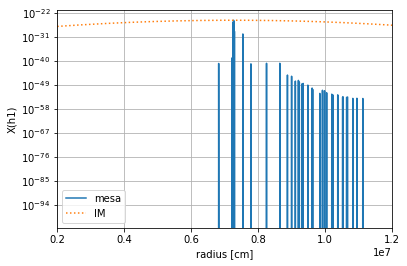

In [34]:
element = 'h1'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(2e6,12e6)
plt.grid()
plt.legend()
plt.savefig("X(h1).png")

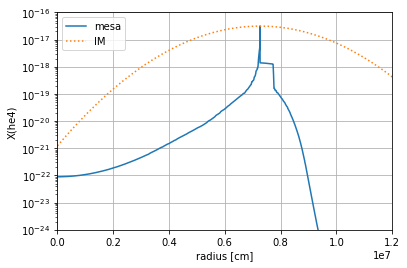

In [41]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,12e6)
plt.ylim(1e-24,1e-16)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

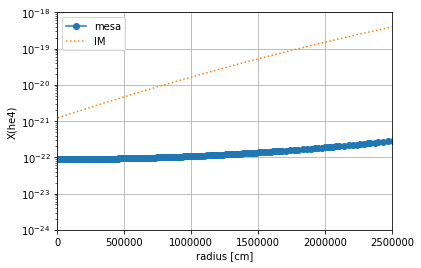

In [40]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,'o-',label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.xlim(0,0.2e8)
plt.xlim(0,0.25e7)
plt.ylim(1e-24,1e-18)
plt.savefig("X(he4).png")

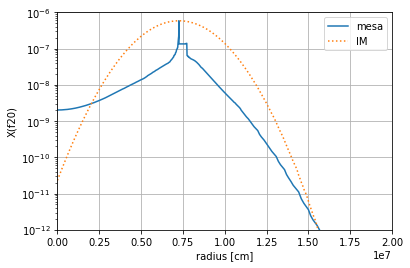

In [15]:
element = 'f20'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,0.2e8)
plt.ylim(1e-12,1e-6)
plt.grid()
plt.legend()
plt.savefig("X(f20).png")

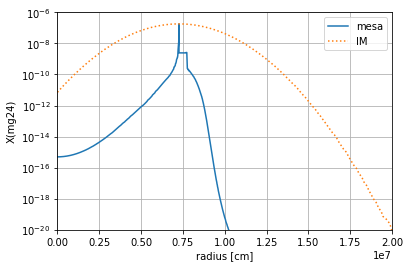

In [36]:
element = 'mg24'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.xlim(0,0.2e8)
plt.ylim(1e-20,1e-6)
plt.legend()
plt.savefig("X(mg24).png")

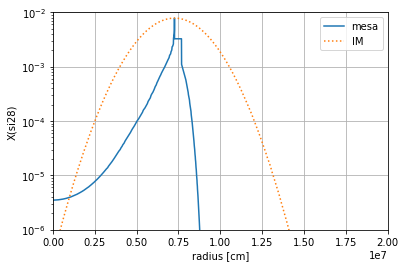

In [17]:
element = 'si28'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,0.2e8)
plt.ylim(1e-6,1e-2)
plt.grid()
plt.legend()
plt.savefig("X(si28).png")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1e-40, top=1e-40
  self.set_ylim(upper, lower, auto=None)


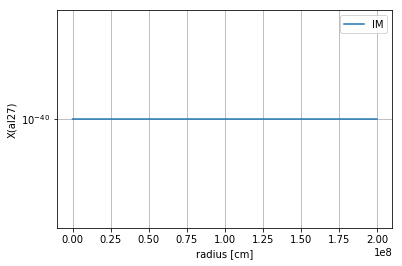

In [18]:
element = 'al27'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),'-',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1e-40, top=1e-40
  self.set_ylim(upper, lower, auto=None)


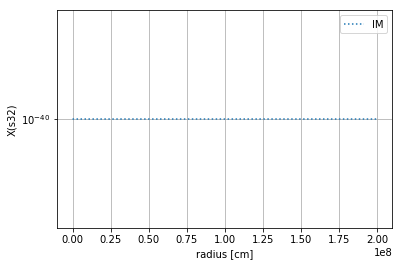

In [19]:
element = 's32'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1e-40, top=1e-40
  self.set_ylim(upper, lower, auto=None)


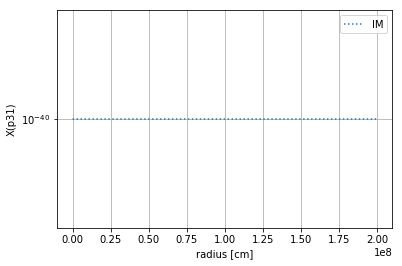

In [20]:
element = 'p31'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

In [21]:
df.head()

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,3906.25,8.348568e+09,6.565862e+08,7.352024e+27,0.000001,0.6,0.399999,7.135653e-12,2.307585e-11,1.229702e-21,1.000000e-40,3.085241e-07,1.000000e-40,1.000000e-40,6.598153e-30
1,11718.75,8.348566e+09,6.565862e+08,7.352022e+27,0.000001,0.6,0.399999,7.292993e-12,2.358467e-11,1.256817e-21,1.000000e-40,3.153270e-07,1.000000e-40,1.000000e-40,6.743641e-30
2,19531.25,8.348564e+09,6.565875e+08,7.352020e+27,0.000001,0.6,0.399999,7.453623e-12,2.410413e-11,1.284498e-21,1.000000e-40,3.222721e-07,1.000000e-40,1.000000e-40,6.892171e-30
3,27343.75,8.348561e+09,6.565896e+08,7.352017e+27,0.000001,0.6,0.399999,7.617612e-12,2.463445e-11,1.312759e-21,1.000000e-40,3.293625e-07,1.000000e-40,1.000000e-40,7.043807e-30
4,35156.25,8.348557e+09,6.565923e+08,7.352012e+27,0.000001,0.6,0.399999,7.785026e-12,2.517585e-11,1.341610e-21,1.000000e-40,3.366010e-07,1.000000e-40,1.000000e-40,7.198611e-30


In [22]:
df.to_csv("/Users/sailor/Desktop/asro_work/test/csv_result/rm_plateo.csv",index = False)